<a href="https://www.kaggle.com/code/patimejia/02-production-notes?scriptVersionId=117891330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **🔬🧫🦠 wip ...**

# Install Required Packages for Kaggle Notebook Environment





In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search fastcore

- The first line imports the `os` module, which provides a way of using operating system dependent functionality.
- The second line checks if the environment variable `KAGGLE_KERNEL_RUN_TYPE` is set.
    - The `environ` attribute is a dictionary-like object that represents the environment variables, and the get method is used to retrieve the value of the `KAGGLE_KERNEL_RUN_TYPE` variable.
    - If the variable is not set, an empty string is returned.
    - The result is stored in the `iskaggle` variable.
- The third line is an if statement that checks if the `iskaggle` variable is truthy.
    - If it is, the line following the if statement uses the `!` operator to run a shell command to install the `fastai`, `duckduckgo_search` and `fastcore` packages via `pip` with the `-Uqq` flags.
    - `-U` tells pip to upgrade any already installed packages
    - `qq` says to run the installation command in "quiet" mode, meaning no output will be displayed.

# Import Required Libraries

In [2]:
from fastai.vision.all import * 
from fastcore.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url
from PIL import Image

- `import fastai` # fastai is the main library
- `import fastcore` # fastcore is a dependency of fastai that contains some useful functions such as L, Path, get_files, get_image_files, verify_images, etc. It is imported when you import fastai.
- `import duckduckgo_search` # duckduckgo_search is a dependency of fastdownload and is used to download the images for the dataset. It cointains a function called ddg_images that lets you search for images on duckduckgo and download them in bulk.
- `import fastdownload` # fastdownload is a dependency of fastai that contains a function called download_url that lets you download a file from a url. Another function called download_images lets you download images from a url in bulk. `download_images` is in the fastai library but it is not as flexible as download_url because     it only works with urls that end in .jpg, .png, .jpeg, .bmp, .gif, etc. `download_url` can download any file from a url.
- `from PIL import Image` # Imports the Python Image Library (PIL) from `fastai.vision.core`. Used for opening, displaying, and manipulating images, such as resizing and obtaining width and height.

## 🤖 testing ...
Test if all imports are successful


In [3]:
# Test if all imports are successful
def test_imports():
    try:
        import fastai
        import fastcore
        import duckduckgo_search
        import fastdownload
        import PIL
    except ImportError as e:
        print(f'Import failed: {e}')
        return

    print(f'fastai version: {fastai.__version__}')
    print(f'fastcore version: {fastcore.__version__}')
    print(f'duckduckgo_search version: {duckduckgo_search.__version__}')
    print(f'fastdownload version: {fastdownload.__version__}')
    print(f'PIL version: {PIL.__version__}')
    print('Success! All imports were successful.')


test_imports()

fastai version: 2.7.10
fastcore version: 1.5.27
duckduckgo_search version: 2.8.0
fastdownload version: 0.0.7
PIL version: 9.1.1
Success! All imports were successful.


## 🤖 testing ...
Test the `ddg_images` function with a simple search

In [4]:
def test_ddg_images(term, max_images):
    # Call ddg_Images with search term and max results
    urls = ddg_images(term, max_results=max_images)

    # Print success message and URLs if images are found
    if urls:
        print('Success! Here are some URLs:')
        print(urls[:3])
    else:
        print('Fail! No images found.')

doing a simple search with `term` and `max_results` parameters:

In [5]:
# test_ddg_images('Schoondle dog photos', 3)
test_ddg_images('Umbelliferae seeds photos', 3)

Success! Here are some URLs:
[{'title': 'Flickr: Discussing Seeds in Apiaceae (Umbelliferae)', 'image': 'https://farm2.static.flickr.com/1189/590821048_7060919a71_m.jpg', 'thumbnail': 'https://tse2.mm.bing.net/th?id=OIP.CqouuT0xF4SmgfrWIzaMrgAAAA&pid=Api', 'url': 'https://www.flickr.com/groups/apiaceae/discuss/72157601017660076/', 'height': 184, 'width': 240, 'source': 'Bing'}, {'title': 'Seed head of Malabaila secacul a herb in the genus Malabaila family ...', 'image': 'https://i.pinimg.com/originals/98/19/1e/98191ec754b5cce09500d2e47f93c677.jpg', 'thumbnail': 'https://tse4.mm.bing.net/th?id=OIP.zUJsUglqXlx36vJ4uBTipAAAAA&pid=Api', 'url': 'https://www.pinterest.com/pin/704039354228628454/', 'height': 400, 'width': 400, 'source': 'Bing'}, {'title': 'ANGELICA "HUGH JUMBLE" (Ferula melitensis) SEEDS (8 seeds) (GIANT ...', 'image': 'https://www.plant-world-seeds.com/images/item_images/000/008/469/large_square/HUGH_JUMBLE.jpg?1569953541', 'thumbnail': 'https://tse1.mm.bing.net/th?id=OIP._A

## 🏓 notes: 
 - The `max_results` is the maximum number of images to return. 
 - It is a `fastai parameter` of the `ddg_images` function
 - The `max_results` parameter is optional.
 - If you do not set the `max_results` parameter, the default is 100.
 - `max_results` takes an **integer** value. 

## 🤖 testing ... 
Test if the `download_url` function is working

Success! File downloaded.


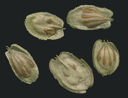

In [6]:
# Test if the download_url function is working

def test_download_url(url, dest):
    # Call download_url with URL and destination
    download_url(url, dest)

    # Print success message if download was successful
    if os.path.exists(dest):
        print('Success! File downloaded.')
    else:
        print('Fail! File not downloaded.')

# Test the function with a simple URL (copy url from previous step)
test_download_url('https://farm2.static.flickr.com/1189/590821048_7060919a71_m.jpg', 'test_image.jpg')

# open downloaded image
im = Image.open('test_image.jpg')
im.to_thumb(128,128)

---------------

# Cleaning up the Current Working Directory (optional)

It is good practice to clean up the directory before you start working on a new project.

In [7]:
# delete all content in the current directory
# !rm -rf * #(optional)

- ***comment out*** this line if you want to keep the files in the current directory.
- This line of code cleans up **test images** the current working directory.
- It is not necessary for the code to run, but it is useful to keep the directory clean and organized. 


-------------